In [1]:
import colorsys
from PIL import Image, ImageDraw

In [2]:
class Color:
    def __init__(self, hexexpr):
        self._hexexpr = hexexpr
        
    def __repr__(self):
        return f'<Color: {self._hexexpr} RGB={self.rgb} HSL={self.hls}'
    
    @property
    def hex(self):
        return self._hexexpr
    
    @property
    def rgb(self):
        return hex2rgb(self._hexexpr)

    @property
    def rgb_f(self):
        return hex2rgb_f(self._hexexpr)
    
    @property
    def hls(self):
        return colorsys.rgb_to_hls(*self.rgb_f)

    @classmethod
    def mix(cls, color1, color2, alpha):
        beta = 1.0 - alpha
        mixed = [rdi(alpha * v1 + beta * v2) for v1, v2 in zip(color1.rgb, color2.rgb)]
        # mixed = colorsys.hls_to_rgb(*[alpha * v1 + beta * v2 for v1, v2 in zip(color1.hls, color2.hls)])
        return cls(rgb2hex(*mixed))
    
    def tint(self, rate):
        h, l, s = self.hls
        return Color(rgb2hex(*rdiseq(colorsys.hls_to_rgb(h, l, s * rate), scale=1.0 / 255)))
    
    
def rdi(v, scale=1.0):
    return int(round(v / scale))

def rdiseq(vs, scale=1.0):
    return [rdi(v, scale) for v in vs]

def hex2rgb(hexexpr):
    r = int(hexexpr[1:3], base=16)
    g = int(hexexpr[3:5], base=16)
    b = int(hexexpr[5:7], base=16)
    return r, g, b

def hex2rgb_f(hexexpr, scale=255):
    rgb = hex2rgb(hexexpr)
    return tuple([v / scale for v in rgb])

def rgb2hex(r, g, b):
    return f'#{r:02x}{g:02x}{b:02x}'

def mix(c1, c2, alpha):
    beta = 1.0 - alpha
    return [alpha * v1 + beta * v2
            for v1, v2 in zip(c1, c2)]

colors_hex = [
    "#666666",
    "#ff4097",
    "#00ffcc",
    "#f7ff40",
    "#4989ff",
    "#ff9f92",
    "#80d8ff",
    "#ffffff"
]

colors = [Color(c) for c in colors_hex]
colors

[<Color: #666666 RGB=(102, 102, 102) HSL=(0.0, 0.4, 0.0),
 <Color: #ff4097 RGB=(255, 64, 151) HSL=(0.9240837696335078, 0.6254901960784314, 1.0),
 <Color: #00ffcc RGB=(0, 255, 204) HSL=(0.4666666666666666, 0.5, 1.0),
 <Color: #f7ff40 RGB=(247, 255, 64) HSL=(0.1736474694589878, 0.6254901960784314, 1.0),
 <Color: #4989ff RGB=(73, 137, 255) HSL=(0.6080586080586081, 0.6431372549019607, 1.0),
 <Color: #ff9f92 RGB=(255, 159, 146) HSL=(0.019877675840978604, 0.7862745098039216, 1.0),
 <Color: #80d8ff RGB=(128, 216, 255) HSL=(0.5511811023622047, 0.7509803921568627, 1.0),
 <Color: #ffffff RGB=(255, 255, 255) HSL=(0.0, 1.0, 0.0)]

In [3]:
Color.mix(Color("#00f000"), Color("#ffffff"), 0.7)

<Color: #4df44d RGB=(77, 244, 77) HSL=(0.3333333333333333, 0.6294117647058823, 0.8835978835978839)

In [6]:
bg_color = Color('#1a1a20')
print(bg_color)

palette = [
    colors,
    [Color.mix(c, bg_color, 0.7) for c in colors],
    [Color.mix(c, bg_color, 0.2) for c in colors]
]

[[c.hex for c in p] for p in palette]

<Color: #1a1a20 RGB=(26, 26, 32) HSL=(0.6666666666666666, 0.11372549019607843, 0.10344827586206896)


[['#666666',
  '#ff4097',
  '#00ffcc',
  '#f7ff40',
  '#4989ff',
  '#ff9f92',
  '#80d8ff',
  '#ffffff'],
 ['#4f4f51',
  '#ba3573',
  '#08ba98',
  '#b5ba36',
  '#3b68bc',
  '#ba7770',
  '#619fbc',
  '#bababc'],
 ['#29292e',
  '#482238',
  '#154842',
  '#464826',
  '#23304d',
  '#483537',
  '#2e404d',
  '#48484d']]

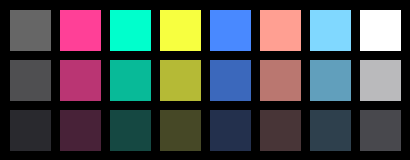

In [7]:
width = 40
margin = 10
n_colors = len(colors)
n_dims = len(palette)
imwidth = margin + n_colors * (width + margin)
imheight = margin + n_dims * (width + margin)

canvas = Image.new('RGB', (imwidth, imheight), (0, 0, 0))
draw = ImageDraw.Draw(canvas)

for i, p in enumerate(palette):
    y = margin + i * (width + margin)
    for j, c in enumerate(p):
        x = margin + j * (width + margin)
        draw.rectangle([x, y, x + width, y + width], fill=c.rgb)
        
canvas